In [2]:
import pandas as pd


df_prov = pd.read_csv("data/turismo_receptor_provincia.csv", sep=";", encoding="utf-8")
df_geo = pd.read_csv("data/spain_locations.csv")
df_prov.head()


,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,"491,0","4075,0","8,3"
1,2019,7,A Coruña,América,Brasil,"717,0","3800,0","5,3"
2,2019,7,A Coruña,América,Canadá,"229,0","1511,0","6,6"
3,2019,7,A Coruña,América,Chile,"70,0","504,0","7,2"
4,2019,7,A Coruña,América,Colombia,"226,0","1740,0","7,7"


In [3]:
df_prov['TURISTAS'] = df_prov['TURISTAS'].str.replace(".", "").str.replace(",", ".").astype(float).astype(int)

In [4]:


#Diccionario de posiciones ajustadas manualmente para un hex map
positions = {
    "La Coruña": (0, 0), "Lugo": (0, 1), "Asturias": (0, 2), "León": (0, 3), "Cantabria": (0, 4),"Vizcaya": (0, 5),

    "Pontevedra": (1, 0.5),"Orense": (1, 1.5),"Zamora": (1, 2.5), "Palencia": (1, 3.5), "Álava": (1, 4.5), "Guipúzcoa": (1, 5.5),
    "Navarra": (1, 6.5), "Lérida": (1, 7.5),"Barcelona": (1, 8.5),"Gerona": (1, 9.5),
    
    "Valladolid": (2, 3), "Burgos": (2, 4), "Soria": (2, 5), "Zaragoza": (2, 6),"Huesca": (2, 7), "Tarragona": (2, 8),
    
    "Salamanca": (3, 2.5),"Segovia": (3, 3.5), "Guadalajara": (3, 4.5),"La Rioja": (3, 5.5),"Teruel": (3, 6.5),

    "Cáceres": (4, 2),"Ávila": (4, 3),"Madrid": (4, 4),"Cuenca": (4, 5), "Castellón": (4, 6),  "Islas Baleares": (4, 9),

    "Huelva": (5, 1.5), "Badajoz": (5, 2.5),"Toledo": (5, 3.5), "Ciudad Real": (5, 4.5),"Albacete": (5, 5.5), "Valencia": (5, 6.5),

    "Sevilla": (6, 2), "Córdoba": (6, 3), "Jaén": (6, 4), "Murcia": (6, 5), "Alicante": (6, 6),

    "Cádiz": (7, 2.5),"Málaga": (7, 3.5),"Granada": (7, 4.5),  "Almería": (7, 5.5), 


    "Santa Cruz de Tenerife": (9, -1.5),"Las Palmas": (9, -0.5),    "Ceuta": (9, 2.5),"Melilla": (9, 4.5)

    
}


# Asignar las posiciones al DataFrame
df_geo["row"] = df_geo["name_es"].map(lambda x: positions[x][0])
df_geo["column"] = df_geo["name_es"].map(lambda x: positions[x][1])



# Convertir los valores de columna a cadena y cambiar los puntos por comas
df_geo["column"] = df_geo["column"].astype(str).str.replace(".", ",")
df_geo["row"] = df_geo["row"].astype(str).str.replace(".", ",")



# Mostrar el DataFrame
print(df_geo)
# Asignar filas y columnas

# Exportar a CSV para Tableau
#df_geo.to_csv("data/provincias_hex_map.csv", index=False)

                   name_es latitude   longitude row column
0                    Ceuta  35,8803      -5,341   9    2,5
1                  Melilla  35,2934    -2,94015   9    4,5
2                  Navarra  42,7493    -1,63845   1    6,5
3                Guipúzcoa  43,1495     -2,2243   1    5,5
4                   Huesca  42,1863  -0,0128081   2    7,0
5                   Lérida  42,0143     1,11518   1    7,5
6                   Gerona  42,0844     2,79123   1    9,5
7                  Badajoz  38,5731    -6,26724   5    2,5
8                    Cádiz  36,4828    -5,82488   7    2,5
9                   Orense  42,1609    -7,59234   1    1,5
10                 Cáceres  39,7279    -6,08204   4    2,0
11               Salamanca  40,8324     -5,9926   3    2,5
12                  Zamora  41,6837    -5,84292   1    2,5
13              Pontevedra  42,5257     -8,4998   1    0,5
14                  Huelva  37,6217    -6,90248   5    1,5
15               Barcelona  41,6575     2,00777   1    8

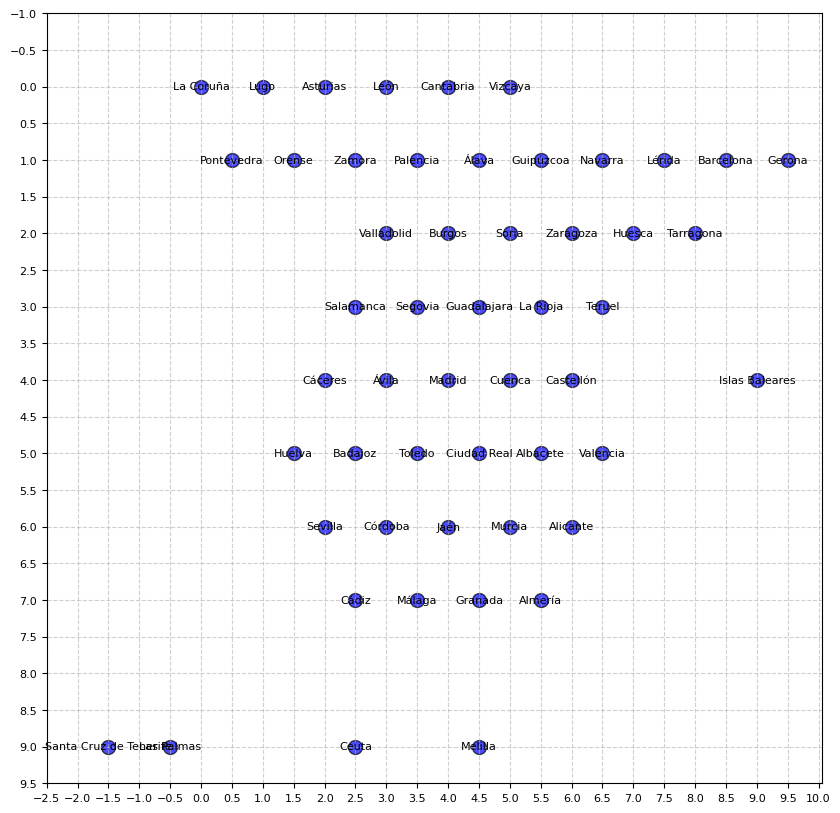

In [5]:
import matplotlib.pyplot as plt

# Convertir las columnas 'row' y 'column' a tipo numérico
df_geo['row'] = df_geo['row'].str.replace(',', '.').astype(float)
df_geo['column'] = df_geo['column'].str.replace(',', '.').astype(float)

# Crear la figura
plt.figure(figsize=(10, 10))

# Graficar puntos
plt.scatter(df_geo['column'], df_geo['row'], c='blue', alpha=0.7, edgecolors='k', s=100)

# Etiquetas de las provincias
for i, name in enumerate(df_geo['name_es']):
    plt.text(df_geo['column'].iloc[i], df_geo['row'].iloc[i], name, fontsize=8, ha='center', va='center')

# Configurar ejes
plt.gca().invert_yaxis()  # Invertir el eje Y para representar mejor el estilo de un hex map
plt.xticks(
    ticks=[round(x, 1) for x in 
           list(df_geo['column'].min() - 1 + i * 0.5 for i in range(int((df_geo['column'].max() - df_geo['column'].min() + 2) / 0.5)))],
    fontsize=8
)
plt.yticks(
    ticks=[round(y, 1) for y in 
           list(df_geo['row'].min() - 1 + i * 0.5 for i in range(int((df_geo['row'].max() - df_geo['row'].min() + 2) / 0.5)))],
    fontsize=8
)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


In [6]:
df_prov['PROVINCIA_DESTINO'].unique() #el de los datos.

#cambiar los nombres de las provincias para que coincidan con los de la tabla de posiciones
df_prov['PROVINCIA_DESTINO'] = df_prov['PROVINCIA_DESTINO'].map({
    'A Coruña': 'La Coruña', 'Lugo': 'Lugo', 'Asturias': 'Asturias', 'León': 'León', 'Cantabria': 'Cantabria', 'Bizkaia': 'Vizcaya',
    'Pontevedra': 'Pontevedra', 'Ourense': 'Orense', 'Zamora': 'Zamora', 'Palencia': 'Palencia', 'Araba/Álava': 'Álava', 'Gipuzkoa': 'Guipúzcoa',
    'Navarra': 'Navarra', 'Lleida': 'Lérida', 'Barcelona': 'Barcelona', 'Girona': 'Gerona', 'Valladolid': 'Valladolid', 'Burgos': 'Burgos',
    'Soria': 'Soria', 'Zaragoza': 'Zaragoza', 'Huesca': 'Huesca', 'Tarragona': 'Tarragona', 'Salamanca': 'Salamanca', 'Segovia': 'Segovia',
    'Guadalajara':'Guadalajara','Albacete': 'Albacete', 'La Rioja': 'La Rioja', 'Teruel': 'Teruel', 'Cáceres': 'Cáceres', 'Ávila': 'Ávila',
    'Alicante/Alacant': 'Alicante', 'Castellón/Castelló': 'Castellón', 'Illes Balears': 'Islas Baleares', 'Huelva': 'Huelva', 'Badajoz': 'Badajoz',
    'Toledo': 'Toledo', 'Total Nacional': 'Total', 'Ceuta':'Ceuta', 'Melilla':'Melilla', 'Ciudad Real': 'Ciudad Real', 'Cuenca': 'Cuenca', 
    'Huelva': 'Huelva', 'Jaén': 'Jaén', 'Cádiz': 'Cádiz', 'Málaga': 'Málaga', 'Sevilla': 'Sevilla', 'Córdoba': 'Córdoba', 'Granada': 'Granada',
    'Almería':'Almería', 'Santa Cruz de Tenerife': 'Santa Cruz de Tenerife', 'Las Palmas': 'Las Palmas','Murcia': 'Murcia', 'Madrid': 'Madrid','Valencia/València': 'Valencia'})

abbreviations = {
    "La Coruña": "C", "Lugo": "LU", "Asturias": "AS", "León": "LE", "Cantabria": "S", "Vizcaya": "BI",
    "Pontevedra": "PO", "Orense": "OR", "Zamora": "ZA", "Palencia": "P", "Álava": "VI", "Guipúzcoa": "SS",
    "Navarra": "NA", "Lérida": "L", "Barcelona": "B", "Gerona": "GI",
    "Valladolid": "VA", "Burgos": "BU", "Soria": "SO", "Zaragoza": "Z", "Huesca": "HU", "Tarragona": "T",
    "Salamanca": "SA", "Segovia": "SG", "Guadalajara": "GU", "La Rioja": "LO", "Teruel": "TE",
    "Cáceres": "CC", "Ávila": "AV", "Madrid": "M", "Cuenca": "CU", "Castellón": "CS", "Islas Baleares": "IB",
    "Huelva": "H", "Badajoz": "BA", "Toledo": "TO", "Ciudad Real": "CR", "Albacete": "AB", "Valencia": "V",
    "Sevilla": "SE", "Córdoba": "CO", "Jaén": "J", "Murcia": "MU", "Alicante": "A",
    "Cádiz": "CA", "Málaga": "MA", "Granada": "GR", "Almería": "AL",
    "Santa Cruz de Tenerife": "TF", "Las Palmas": "GC", "Ceuta": "CE", "Melilla": "ML"
}

df_prov['ABR'] = df_prov['PROVINCIA_DESTINO'].map(abbreviations)


In [7]:
len(df_geo['name_es'].unique())

df_prov['PROVINCIA_DESTINO'].unique()

array(['La Coruña', 'Albacete', 'Alicante', 'Almería', 'Álava',
       'Asturias', 'Badajoz', 'Barcelona', 'Vizcaya', 'Burgos',
       'Cantabria', 'Castellón', 'Ceuta', 'Ciudad Real', 'Cuenca',
       'Cáceres', 'Cádiz', 'Córdoba', 'Guipúzcoa', 'Gerona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Islas Baleares', 'Jaén',
       'La Rioja', 'Las Palmas', 'León', 'Lérida', 'Lugo', 'Madrid',
       'Melilla', 'Murcia', 'Málaga', 'Navarra', 'Orense', 'Palencia',
       'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Segovia',
       'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Total',
       'Valencia', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila'],
      dtype=object)

In [8]:
df_prov['ABR'].unique()
df_prov.head()

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA,ABR
0,2019,7,La Coruña,América,Argentina,491,"4075,0","8,3",C
1,2019,7,La Coruña,América,Brasil,717,"3800,0","5,3",C
2,2019,7,La Coruña,América,Canadá,229,"1511,0","6,6",C
3,2019,7,La Coruña,América,Chile,70,"504,0","7,2",C
4,2019,7,La Coruña,América,Colombia,226,"1740,0","7,7",C


In [9]:
#df_prov.to_csv("data/turismo_provincias.csv", index=False)

In [10]:
all_ranks = []
for year in range(2019, df_prov['AÑO'].max()):
    rank_year = df_prov.query(f'AÑO == {year}').groupby(['PROVINCIA_DESTINO']).sum()['TURISTAS'].sort_values(ascending=False).index
    all_ranks.append(rank_year)

all_ranks_df = pd.DataFrame(all_ranks).T
all_ranks_df.columns = range(2019, df_prov['AÑO'].max())

In [11]:
all_ranks_df.head()

,2019,2020,2021,2022,2023
0,Total,Total,Total,Total,Total
1,Islas Baleares,Barcelona,Islas Baleares,Islas Baleares,Islas Baleares
2,Barcelona,Madrid,Barcelona,Barcelona,Barcelona
3,Madrid,Las Palmas,Madrid,Las Palmas,Las Palmas
4,Las Palmas,Gerona,Las Palmas,Madrid,Madrid


In [12]:
all_rank_year = df_prov[['AÑO', 'PROVINCIA_DESTINO']].drop_duplicates(subset=['PROVINCIA_DESTINO'])
for year in range(2019, df_prov['AÑO'].max()):
    rank_df_year = all_ranks_df[year].reset_index()
    rank_df_year.columns = [f'RANK_{year}', 'PROVINCIA_DESTINO']
    all_rank_year = all_rank_year.merge(rank_df_year, left_on='PROVINCIA_DESTINO', right_on='PROVINCIA_DESTINO', how='left')

all_rank_year_df = all_rank_year.drop(columns=['AÑO'])
all_rank_year_df.sort_values('RANK_2019').head()

,PROVINCIA_DESTINO,RANK_2019,RANK_2020,RANK_2021,RANK_2022,RANK_2023
47,Total,0,0,0,0,0
24,Islas Baleares,1,6,1,1,1
7,Barcelona,2,1,2,2,2
31,Madrid,3,2,3,4,4
27,Las Palmas,4,3,4,3,3


In [13]:
# all_rank_year_df.to_csv("data/turismo_provincias_rank.csv", index=False)


total_turistas_provincia = df_prov.groupby('PROVINCIA_DESTINO')['TURISTAS'].sum().reset_index()
total_turistas_provincia.columns = ['PROVINCIA_DESTINO', 'TOTAL_TURISTAS']
top_five_provinces = total_turistas_provincia.nlargest(6, 'TOTAL_TURISTAS')
top_5 = top_five_provinces['PROVINCIA_DESTINO']
#solamente para eliminar y no tener en cuenta el total nacional (ejecutar si se quiere eliminar)
#top_five_provinces = top_five_provinces.drop(45)

print(top_five_provinces)



   PROVINCIA_DESTINO  TOTAL_TURISTAS
45             Total      1128450507
21    Islas Baleares       166944734
5          Barcelona       141248333
29            Madrid        95180849
25        Las Palmas        91425745
32            Málaga        75508123


In [14]:
def get_ranking_provinces(df_prov: pd.DataFrame, province_list: list, min_year: int = 2019, max_year: int = 2023):
    all_ranks = []
    for year in range(min_year, max_year + 1):
        rank_year = df_prov.query(f'AÑO == {year} & PROVINCIA_DESTINO in @province_list & PROVINCIA_DESTINO != "Total"').groupby(['PROVINCIA_DESTINO']).sum()['TURISTAS'].sort_values(ascending=False).index
        all_ranks.append(rank_year)

    all_ranks_df = pd.DataFrame(all_ranks).T
    all_ranks_df.columns = range(2019, df_prov['AÑO'].max())
    return all_ranks_df

def get_tableau_ranking(df_prov: pd.DataFrame, df_ranking_provinces: pd.DataFrame, min_year: int = 2019, max_year: int = 2023):
    all_rank_year = df_prov[['AÑO', 'PROVINCIA_DESTINO']].drop_duplicates(subset=['PROVINCIA_DESTINO'])
    distintct_provinces = df_ranking_provinces.iloc[:,1]
    all_rank_year = all_rank_year.query('PROVINCIA_DESTINO in @distintct_provinces')
    for year in range(min_year, max_year + 1):
        rank_df_year = df_ranking_provinces[year].reset_index()
        rank_df_year.columns = [f'RANK_{year}', 'PROVINCIA_DESTINO']
        all_rank_year = all_rank_year.merge(rank_df_year, left_on='PROVINCIA_DESTINO', right_on='PROVINCIA_DESTINO', how='left')

    all_rank_year_df = all_rank_year.drop(columns=['AÑO'])
    sort_year = 2019
    all_rank_year_df = all_rank_year_df.sort_values(f'RANK_{sort_year}')

    return all_rank_year_df

def get_bumpchart_ranking(df_ranking_tableau: pd.DataFrame):
    bump_format = []
    n_elements = len(df_ranking_tableau)

    for index, row in df_ranking_tableau.iterrows():
        bump_format.append({"Year": 2019, "Position": n_elements - row["RANK_2019"], "Province": row["PROVINCIA_DESTINO"]})
        bump_format.append({"Year": 2020, "Position": n_elements - row["RANK_2020"], "Province": row["PROVINCIA_DESTINO"]})
        bump_format.append({"Year": 2021, "Position": n_elements - row["RANK_2021"], "Province": row["PROVINCIA_DESTINO"]})
        bump_format.append({"Year": 2022, "Position": n_elements - row["RANK_2022"], "Province": row["PROVINCIA_DESTINO"]})
        bump_format.append({"Year": 2023, "Position": n_elements - row["RANK_2023"], "Province": row["PROVINCIA_DESTINO"]})

    bump_df = pd.DataFrame(bump_format)

    return bump_df

In [15]:
# all_ranks = []
# for year in range(2019, df_prov['AÑO'].max()):
#     rank_year = df_prov.query(f'AÑO == {year} & PROVINCIA_DESTINO in @top_5').groupby(['PROVINCIA_DESTINO']).sum()['TURISTAS'].sort_values(ascending=False).index
#     all_ranks.append(rank_year)

# all_ranks_df = pd.DataFrame(all_ranks).T
# all_ranks_df.columns = range(2019, df_prov['AÑO'].max())

df_ranking_provinces = get_ranking_provinces(df_prov, top_5)
df_bumpchart_ranking = get_tableau_ranking(df_prov, df_ranking_provinces).pipe(get_bumpchart_ranking).sort_values(['Year', 'Position'])
df_bumpchart_ranking

,Year,Position,Province
20,2019,1,Málaga
15,2019,2,Las Palmas
10,2019,3,Madrid
5,2019,4,Barcelona
0,2019,5,Islas Baleares
21,2020,1,Málaga
1,2020,2,Islas Baleares
16,2020,3,Las Palmas
11,2020,4,Madrid
6,2020,5,Barcelona


In [16]:
# all_rank_year = df_prov[['AÑO', 'PROVINCIA_DESTINO']].drop_duplicates(subset=['PROVINCIA_DESTINO'])
# for year in range(2019, df_prov['AÑO'].max()):
#     rank_df_year = all_ranks_df[year].reset_index()
#     rank_df_year.columns = [f'RANK_{year}', 'PROVINCIA_DESTINO']
#     all_rank_year = all_rank_year.merge(rank_df_year, left_on='PROVINCIA_DESTINO', right_on='PROVINCIA_DESTINO', how='left')

# all_rank_year_df = all_rank_year.drop(columns=['AÑO'])
# all_rank_year_df = all_rank_year_df.sort_values('RANK_2019').iloc[1:6]

# all_rank_year_df
# all_rank_year_df.to_csv("data/turismo_provincias_rank_top5.csv", index=False)


Bump chart for ggplot2

In [17]:
# formato_bump = []

# for index, row in all_rank_year_df.iterrows():
#     formato_bump.append({"Year": 2019, "Position": 6 - row["RANK_2019"], "Province": row["PROVINCIA_DESTINO"]})
#     formato_bump.append({"Year": 2020, "Position": 6 - row["RANK_2020"], "Province": row["PROVINCIA_DESTINO"]})
#     formato_bump.append({"Year": 2021, "Position": 6 - row["RANK_2021"], "Province": row["PROVINCIA_DESTINO"]})
#     formato_bump.append({"Year": 2022, "Position": 6 - row["RANK_2022"], "Province": row["PROVINCIA_DESTINO"]})
#     formato_bump.append({"Year": 2023, "Position": 6 - row["RANK_2023"], "Province": row["PROVINCIA_DESTINO"]})



# formato_bump_df = pd.DataFrame(formato_bump)

# formato_bump_df


In [18]:
# formato_bump_df.to_csv("data/turismo_provincias_rank_bump_top5.csv", index=False)

### Datos para el gráfico de barras con porcentajes sobre el total

In [ ]:
df_sin_total = df_prov.query('PROVINCIA_DESTINO != "Total"')
# df_sin_total
df_sin_total.groupby(['PROVINCIA_DESTINO', 'AÑO'])['TURISTAS'].sum().reset_index().sort_values(['AÑO', 'TURISTAS']).head()
all_years = []
for year in range(2019, df_prov['AÑO'].max()):
    year_df = df_sin_total.query(f'AÑO == {year}').groupby(['PROVINCIA_DESTINO']).sum()['TURISTAS'].sort_values(ascending=False).reset_index()
    year_df['AÑO'] = year
    year_df['Porcentaje'] = year_df['TURISTAS'] / year_df['TURISTAS'].sum()
    all_years.append(year_df)

all_years_df = pd.concat(all_years)
# all_years_df['Porcentaje'] = all_years_df['Porcentaje'].astype(str).str.replace(".", ",")
# all_years_df.to_csv(
#     "data/turismo_provincias_porcentaje.csv", index=False
# )
all_years_df.head()

,PROVINCIA_DESTINO,TURISTAS,AÑO,Porcentaje
0,Islas Baleares,22398635,2019,0.161702
1,Barcelona,18345290,2019,0.132440
2,Madrid,10751964,2019,0.077621
3,Las Palmas,10173900,2019,0.073448
4,Málaga,9955676,2019,0.071873


In [28]:
df_prov = pd.read_csv("data/turismo_receptor_provincia_pais.csv", sep=";", encoding="ISO-8859-1")
df_prov['TURISTAS'] = df_prov['TURISTAS'].str.replace(".", "").str.replace(",", ".").astype(float).astype(int)
df_sin_total = df_prov.query('PROVINCIA_DESTINO != "Total"')
df_sin_total.groupby(['PROVINCIA_DESTINO', 'AÑO'])['TURISTAS'].sum().reset_index().assign(
    Porcentaje=lambda x: x['TURISTAS'] / x.groupby('AÑO')['TURISTAS'].transform('sum')
).query('AÑO == 2019').sort_values(['AÑO', 'TURISTAS'], ascending=False)

,PROVINCIA_DESTINO,AÑO,TURISTAS,Porcentaje
282,Total Nacional,2019,138675391,0.500284
144,Illes Balears,2019,22398635,0.080805
42,Barcelona,2019,18345290,0.066182
186,Madrid,2019,10751964,0.038789
162,Las Palmas,2019,10173900,0.036703
204,Málaga,2019,9955676,0.035916
12,Alicante/Alacant,2019,9797789,0.035346
114,Girona,2019,8237476,0.029717
240,Santa Cruz de Tenerife,2019,7070054,0.025506
264,Tarragona,2019,3703068,0.013359


In [21]:
all_years_df.groupby('PROVINCIA_DESTINO').sum()

,TURISTAS,AÑO,Porcentaje
PROVINCIA_DESTINO,,,
Albacete,1936406,10105,0.012474
Alicante,55387188,10105,0.322556
Almería,8828902,10105,0.054344
Asturias,5222649,10105,0.032108
Badajoz,6171669,10105,0.038791
Barcelona,106165008,10105,0.611999
Burgos,6006687,10105,0.037544
Cantabria,4590171,10105,0.027967
Castellón,7254591,10105,0.045492
